In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def make_distibution_tukey(m, sigma_x, sigma_y, delta, n):
    X = np.random.normal(m,sigma_x, n)
    Y = np.random.normal(m,sigma_y, n)
    Z = np.random.uniform(0,1,n)
    U = np.array([x if z > delta else y for x,y,z in zip(X, Y, Z) ])
    return U


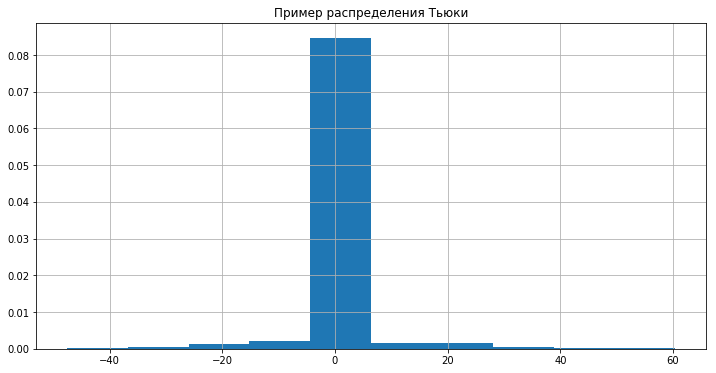

In [3]:
U = make_distibution_tukey(0, 1, 20, 0.1, 1000)
plt.figure(figsize=(12,6))
plt.hist(U, density=True)
plt.title('Пример распределения Тьюки')
plt.grid()

In [4]:
def student(x, y, alpha=0.05):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    s_2 = (1 / (len(x) + len(y))) * (np.sum((x - x_mean) ** 2) + np.sum((y - y_mean) ** 2 ))
    t_value = (x_mean - y_mean) / ((s_2 * (1 / len(x) + 1 / len(y))) ** 0.5)
    df = len(x) + len(y) - 2
    p_value = round((1 - stats.t.cdf(abs(t_value), df)) * 2, 3)
    return t_value, p_value

def ranging(x, y):
    z = np.sort(np.concatenate((x,y)))
    R = np.array([])
    names = np.array([])
    i = 1
    while i <= len(z):
        xy_count = (z == z[i-1]).sum()
        if xy_count == 1:
            R = np.append(R, i)
            if z[i-1] in x:
                names = np.append(names, 0)
            else:
                names = np.append(names, 1)
        else:
            x_count = (x == z[i-1]).sum()
            for j in range(xy_count):
                R = np.append(R, i + (c - 1) / 2)
            for j in range(x_count):
                names = np.append(names, 0)
            for j in range(xy_count -x_count):
                names = np.append(names, 1)
        i += xy_count
    return np.append([R], [names], axis = 0)


def wilcoxon(x, y,alpha=0.05):
    ranged = ranging(x, y)
    w = np.sum(r0  for r0,r1 in zip(ranged[0],ranged[1]) if r1==1)
    mw = len(x) / 2 * (len(x) + len(y) + 1)
    dw = len(x)* len(y) / 12 * (len(x) + len(y) + 1)
    w_value = (w - mw) / (dw ** 0.5)
    p_value = round((1 - stats.norm.cdf((w_value))), 3)
    return w_value, p_value

## Подсчёт ошибок 2-го рода
### Один параметр меняется остальные const

In [5]:
def plot_errors(errors_student, errors_wilcoxon, param, xlabel):
    fig = plt.figure(figsize=(17, 7))
    plt.grid() 
    plt.title('Beta error frequency')
    plt.plot(param, errors_student, color='green',label='Критерий Стьюдена')
    plt.plot(param, errors_wilcoxon, color='red',label='Критерий Вилкоксона')
    plt.xlabel(xlabel)
    plt.ylabel('freq')
    plt.legend()
    plt.grid(True) 
    plt.show()

In [6]:
def calc_error_frequency(test ,theta, sigma1, sigma2, delta, n, alpha, num_experiments):
    test_res = []
    for i in range(num_experiments):
        X =  make_distibution_tukey(0, sigma1, sigma2, delta,  n)
        Y =  make_distibution_tukey(theta, sigma1, sigma2, delta, n) 
        p_value_test = test(X,Y)[1]
#         print(p_value_test)
        test_res.append( p_value_test <= alpha )
    errors_res_freq = (len(test_res) - sum(test_res)) / len(test_res)
    return errors_res_freq
        

### $\sigma_2$

In [7]:
num_experiments = 500
n = 200
alpha = 0.05
theta = 3
delta = 0.1
sigma1 = 1
sigma2_list = range(10, 30)

errors_student_test_frequency = [
        calc_error_frequency(
            student, 
            theta, 
            sigma1, 
            sigma2, 
            delta, 
            n, 
            alpha, 
            num_experiments
        ) for sigma2 in sigma2_list
]
errors_wilcoxon_test_frequency  = [
    calc_error_frequency(
        stats.wilcoxon, 
        theta, 
        sigma1, 
        sigma2, 
        delta, 
        n, 
        alpha, 
        num_experiments
    ) for sigma2 in sigma2_list
]

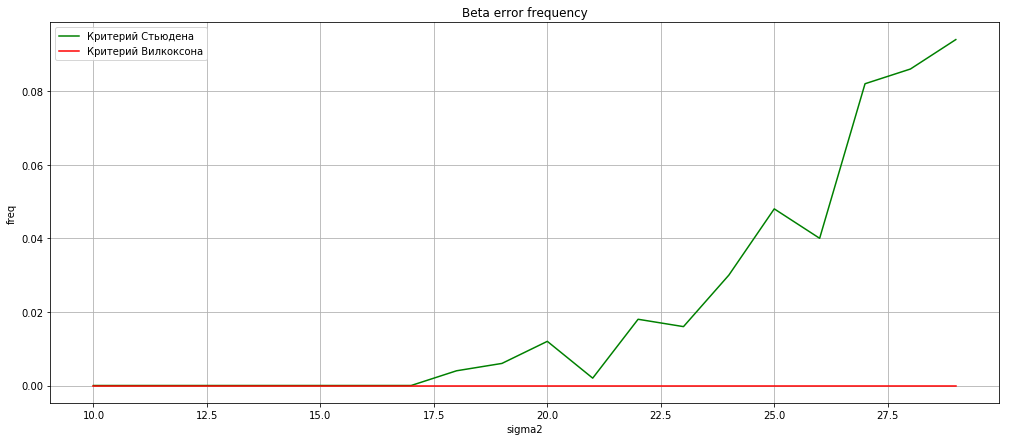

In [8]:
plot_errors(errors_student_test_frequency, errors_wilcoxon_test_frequency, sigma2_list,'sigma2')

### $\delta$

In [9]:
num_experiments = 500
n = 200
alpha = 0.05
theta = 3
delta_list = np.arange(0, 1, 0.025)
sigma1 = 1
sigma2 = 10

errors_student_test_frequency = [
        calc_error_frequency(
            student, 
            theta, 
            sigma1, 
            sigma2, 
            delta, 
            n, 
            alpha, 
            num_experiments
        ) for delta in delta_list
]
errors_wilcoxon_test_frequency  = [
    calc_error_frequency(
       stats.wilcoxon, 
        theta, 
        sigma1, 
        sigma2, 
        delta, 
        n, 
        alpha, 
        num_experiments
    ) for delta in delta_list
]

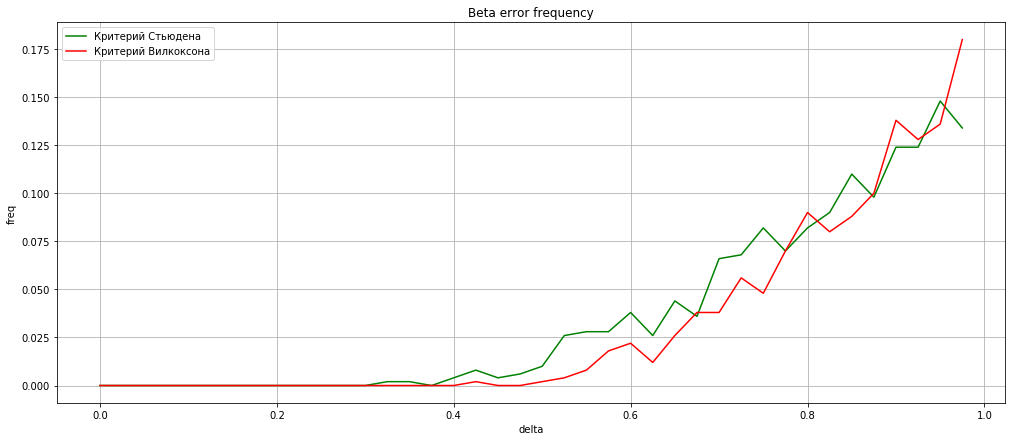

In [10]:
plot_errors(errors_student_test_frequency, errors_wilcoxon_test_frequency, delta_list,'delta')

### $\theta$

In [11]:
num_experiments = 500
n = 200
alpha = 0.05
theta_list = np.arange(0, 3.1, 0.1)
delta = 0.1
sigma1 = 1
sigma2 = 10

errors_student_test_frequency = [
        calc_error_frequency(
            student, 
            theta, 
            sigma1, 
            sigma2, 
            delta, 
            n, 
            alpha, 
            num_experiments
        ) for theta in theta_list
]
errors_wilcoxon_test_frequency  = [
    calc_error_frequency(
       stats.wilcoxon, 
        theta, 
        sigma1, 
        sigma2, 
        delta, 
        n, 
        alpha, 
        num_experiments
    ) for theta in theta_list
]

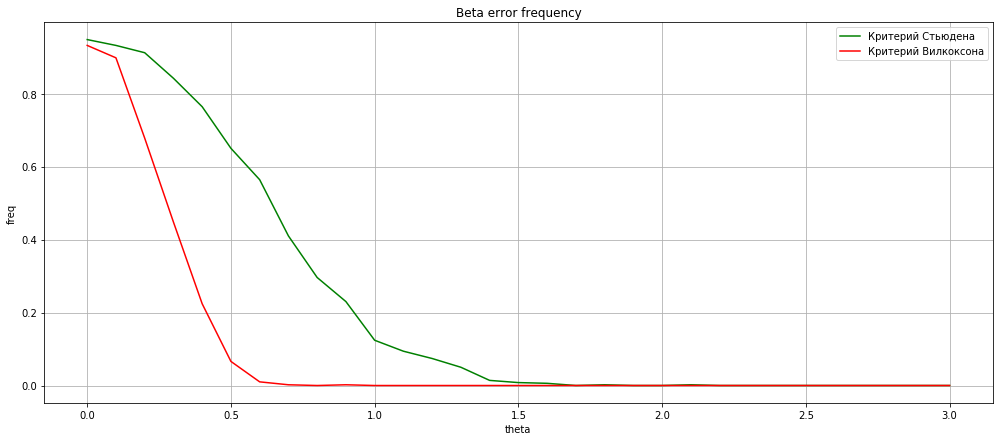

In [12]:
plot_errors(errors_student_test_frequency, errors_wilcoxon_test_frequency, theta_list,'theta')